In [ ]:
import random
from collections import deque
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from IPython import display

npoints = 50
x = deque([0], maxlen=npoints)
y = deque([0], maxlen=npoints)
fig, ax = plt.subplots()
[line] = ax.step(x, y)


def update(dy):
    x.append(x[-1] + 1)
    y.append(y[-1] + dy)

    line.set_xdata(x)
    line.set_ydata(y)

    ax.relim()
    ax.autoscale_view(True, True, True)

    return line, ax

ani = animation.FuncAnimation(fig, update,
                              frames=np.random.randint(-1, 2, size=3*npoints),
                              interval=30)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

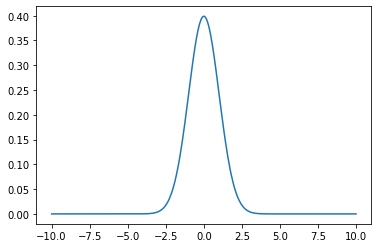

In [ ]:
# task1

import numpy as np
import matplotlib.pyplot as plt

mu,sigma,n = 0.,1.,1000
x = [np.random.uniform(-10, 10) for i in range(n)]
x = np.sort(np.array(x))

def normal(x,mu,sigma):
    return ( 2.*np.pi*sigma**2. )**-.5 * np.exp( -.5 * (x-mu)**2. / sigma**2. )

y = normal(x,mu,sigma)
plt.plot(x, y)

In [ ]:
#task 4

import numpy as np
from tqdm import tqdm

years = [i * 0.5 for i in range(1, 9)]

s_0 = 10

def integral_trapeze(t):
  h = t
  mu = 0.1 * t
  sigma = t / 100
  return h/2 * (mu - sigma**2 / 2)

def integral_mk(j, t):
  nj = int(2.5 * 10**7 / 8 * j)
  ksi = np.random.normal(0,1,1)
  sum_sigma = 0
  for k in tqdm(range(nj)):
    sigma = np.random.uniform(t) / 100
    sum_sigma += sigma
  return float(np.sqrt(t) * ksi / nj * sum_sigma)
  
S_t = []
for j, tj in enumerate(years):
  s_t = s_0 * np.exp(integral_trapeze(tj) + integral_mk(j+1, tj))
  S_t.append(s_t)
print(S_t)


100%|██████████| 25000000/25000000 [01:24<00:00, 295814.34it/s]

[10.14549021384367, 10.562670949424824, 11.266902842275865, 12.192668530399004, 13.633421852124258, 15.767215035222655, 17.38845731318862, 23.75281555391977]


In [ ]:
# task 5

def integral_trapeze_bond(t):
  h = t
  mu = 0.1 * t
  sigma = t / 100
  return h/2 * mu

B_t = []

for t in years:
  B_t.append(s_0 * np.exp(integral_trapeze_bond(t)))
print(B_t)

[10.125784515406345, 10.512710963760242, 11.190722569127807, 12.214027581601698, 13.668379411737963, 15.683121854901689, 18.450382334225, 22.255409284924678]


[9.972006054463638, 10.048229975499574, 9.945159101390013, 9.828763678806304, 9.566614049915886, 9.723318800057825, 10.026422444559712, 10.45580156907625]


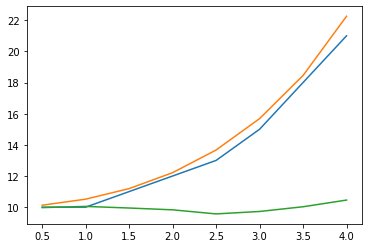

In [ ]:
# task 6

import matplotlib.pyplot as plt

def runge_kutt(s0, ti, i):
  ksi = np.random.normal(0,1,1)
  mu = 0.1 * ti
  ni = int(1000 / 8 * i)
  h = 4 / ni
  sigma = ti / 100
  k1 = float(si + mu*s0*h + sigma*s0*np.sqrt(ti)*ksi)

  ti = ti + 0.5/2
  si = s0 + 0.5/2*k1
  k2 = float(si + mu*si*h + sigma*si*np.sqrt(ti)*ksi)

  ti = ti + 0.5/2
  si = s0 + 0.5/2*k2
  k3 = float(si + mu*si*h + sigma*si*np.sqrt(ti)*ksi)

  ti = ti + 0.5
  si = s0 + 0.5*k3
  k4 = float(si + mu*si*h + sigma*si*np.sqrt(ti)*ksi)
  return float(s0 + 0.5/6*(k1 + 2*k2 + 2*k3 + k4))

RK = []
si = s_0
for i, ti in enumerate(years):
  si = runge_kutt(si, ti, i+1)
  RK.append(si)
print(RK)
plt.plot(years, S_t) 
plt.plot(years, B_t)
plt.plot(years, RK)